<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию" data-toc-modified-id="Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откройте файл с данными и изучите общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Ответьте-на-вопросы" data-toc-modified-id="Шаг-3.-Ответьте-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Ответьте на вопросы</a></span></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Введение**

Возврат кредитов в банк окружен большим количеством рисков как для заемщика, так и для банка. Данный кейс предлагает взглянуть на данные со стороны банка и определить вероятность возврата кредита заемщиками исходя из полученных данных о платежеспособности клиентов. 

Цель исследования — проверьте три гипотезы:
1. Вероятность возврата кредита в срок выше у клиентов с детьми;
2. Наличие супруга/супруга у заемщика положительно влияет на возврат кредита в срок;
3. Высокий уровень дохода обеспечивает возврат кредита в срок;
4. Вероятность возврата кредита в срок зависит от цели кредита. 

**Ход исследования**

Данные о поведении пользователей получены из файла '/datasets/data.csv' О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.
Затем, на этапе предобработки будут исправлены ошибки в данных и подготовка таблицы для исследования
Таким образом, исследование пройдёт в три этапа:
1. Обзор данных.
2. Предобработка данных.
3. Проверка гипотез.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
!pip install seaborn -U
import seaborn as sns

from IPython.display import display
display(pd)
from pymystem3 import Mystem 
m = Mystem()

<module 'pandas' from '/Users/l.stefanenko/opt/anaconda3/lib/python3.9/site-packages/pandas/__init__.py'>

In [2]:
data = pd.read_csv('/Users/l.stefanenko/Desktop/Yandex/Github/№2 Предобработка_Прогноз возврата кредита/data (2).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Таблица состоит из 12 колонок и 21525 строк. 

Описание данных

- children — количество детей в семье
- days_employed — трудовой стаж в днях
- dob_days — возраст клиента в годах
- education — образование клиента
- education_id — идентификатор образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — доход в месяц
- purpose — цель получения кредита

Для удобства сделаем замену названия колонки dob_days--age через функцию rename

In [3]:
data = data.rename(columns = {"dob_years":"age"} )           
data['education'] = data['education'].str.lower()#нижний регистр
data.describe().T

,count,mean,std,min,25%,50%,75%,max
children,21525.0,0.538908,1.381587,-1.000000,0.000000,0.000000,1.000000,2.000000e+01
days_employed,19351.0,63046.497661,140827.311974,-18388.949901,-2747.423625,-1203.369529,-291.095954,4.017554e+05
age,21525.0,43.293380,12.574584,0.000000,33.000000,42.000000,53.000000,7.500000e+01
education_id,21525.0,0.817236,0.548138,0.000000,1.000000,1.000000,1.000000,4.000000e+00
family_status_id,21525.0,0.972544,1.420324,0.000000,0.000000,0.000000,1.000000,4.000000e+00
debt,21525.0,0.080883,0.272661,0.000000,0.000000,0.000000,0.000000,1.000000e+00
total_income,19351.0,167422.302208,102971.566448,20667.263793,103053.152913,145017.937533,203435.067663,2.265604e+06


**Вывод**

В таблице был разный регистр в столбике 'education', устранили эту ошибку для продолжения работы с таблицей

## Шаг 2. Предобработка данных

### Обработка пропусков

In [4]:
data.isna().sum()

children               0
days_employed       2174
age                    0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Мы видим, что столбцы days_employed и total_income имеют разное количество пропусков равное 2174.

Пропуски составляют 10% от общего числа данных - это довольно много. 
Удалять нельзя Есть корреляция в возникновении пропусков: равное количество респондентов не дали данных о своем доходе и соответственно днях работы. Возможно у них не было этого вопроса в анкете, возможно они скрывают свои доходы и соотвественно дни работы, которые считаются системой автоматически.В данной ситуации для заполнения пропусков, ипользуем медиану. 

In [5]:
#узнаем сколько клиентов с указанным гендером F в таблице
data [data['gender'] =='F'].count()

children            14236
days_employed       12752
age                 14236
education           14236
education_id        14236
family_status       14236
family_status_id    14236
gender              14236
income_type         14236
debt                14236
total_income        12752
purpose             14236
dtype: int64

Перед заменой пропусков заменим все значения на положительные с мопощью функции abs

In [6]:
data['days_employed'] = data['days_employed'].abs()
data['children'] = data['children'].abs()

Введем новые переменные
- total_income_avg - медианное значение доходов клиентов
- days_employed_avg - медианное значение дней работы клиентов
Заполним этими значениями наши пропуски в столбцах

In [7]:
total_income_avg = data['total_income'].median() 
data['total_income'] = data['total_income'].fillna (value = total_income_avg)
days_employed_avg = data['days_employed'].median() 
data['days_employed'] = data['days_employed'].fillna (value = days_employed_avg)
display (data.head(5))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


В ходе работы были найдены аномальные значения в таблице. 

- стаж работы более 930 лет в столбце days_employed
- 20 детей в столбце children
- неопределенный пол XNA в столбце gender
- опечатка 'ремонт жилью'в столбике purpose

Произведем замену значений с помощью метода replace и заменим стаж работы на макисмальный, т.к. чаще всего аномальное значение выпадало в статусе "пенсионер"

In [8]:
data['gender'] = data['gender'].replace('XNA', 'F')
data['children'] = data['children'].replace(20, 2)
data['purpose'] = data['purpose'].replace('ремонт жилью','ремонт жилья')
print ('Количество аномальных значений стажа равно:',data[data['days_employed'] > 47*365] ['days_employed'].count())#3447 значений больше 47 (65 пенсионный возраст - 18) лет рабочего стажа
print ('Заменим аномальные значения на максимально возможный стаж, получим таблицу ниже')
data.loc[data['days_employed'] > 17155, 'days_employed'] = 17155 #заменили все аномальные занчения на максимум
display (data.head (5))

Количество аномальных значений стажа равно: 3447
Заменим аномальные значения на максимально возможный стаж, получим таблицу ниже


,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,17155.000000,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


**Вывод**

В ходе работы по предобработке данных были установлены следующие ошибки в таблице, требующие устранения: 
Пропущенные значения и аномальные значения. Ошибки устранены.
Подготовка данных для работы: очищние данных и изменение типа на целочисленные значения для упрощения расчетов и экономии места в памяти, очищение ошибки в данных о днях работы (замена аномальных на максимальное значение 17155 дней)
Также заменили значение XNA нв F в колонке "пол" ,т.к. гипотеза строилась вне зависимоти от пола, то можно сюда поставить любой пол. Также можно было просто удалить эту строку, т.к. она всего одна во всей таблице и на результат не сильно повлияет. 

### Замена типа данных

Проверим какие типы данных есть в таблице

In [9]:
data.dtypes

children              int64
days_employed       float64
age                   int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [10]:
data['total_income'] = data['total_income'].astype('int')
data['education_id'] = data['education_id'].astype('uint8')
data['family_status_id'] = data['family_status_id'].astype('uint8')
data['family_status'] = data['family_status'].astype("str")
data['education'] = data['education'].astype("str")
data['income_type'] = data['income_type'].astype("str")
data['children'] = data['children'].astype('uint8')
data['debt'] = data['debt'].astype('uint8')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  uint8  
 1   days_employed     21525 non-null  float64
 2   age               21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  uint8  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  uint8  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  uint8  
 10  total_income      21525 non-null  int64  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int64(2), object(5), uint8(4)
memory usage: 1.4+ MB


**Вывод**

В ходе замены типа данных место, занимаемое в памяти сократилось почти в два раза. с 2,6+ МВ до 1,4+МВ

### Обработка дубликатов

In [11]:
print (data.duplicated().sum())

71


In [12]:
data = data.drop_duplicates().reset_index(drop = True)
print (data.duplicated().sum())

0


**Вывод**

Во всей таблице 71 дубликат. Это значение менее одного процента и связано с заменами, производимыми выше. 
То есть мы заменили все дни работы на максимальное - 17155 и total_income на среднее арифметическое 167422. Произведем удаление дубликатов с помощью метода drop_duplicates()

### Лемматизация

In [13]:
def category_of_purpose(row):
    lem_purpose = m.lemmatize(row['purpose'])
    if 'автомобиль' in lem_purpose:
        return 'автомобиль'
    if ('жилье' in lem_purpose) or ('недвижимость' in lem_purpose ):
        return 'недвижимость'
    if ('образование' in lem_purpose):
        return 'обучение'
    if ('свадьба' in lem_purpose):
        return 'свадьба'
    else:
        return 'не определено'
data['category'] = data.apply(category_of_purpose, axis=1)
display (data.tail())

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category
21449,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,недвижимость
21450,0,17155.000000,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль
21451,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,недвижимость
21452,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль
21453,2,1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047,на покупку автомобиля,автомобиль


**Вывод**

Произведена проверка уникальных значений в столбце  purpose. На основе полученных данных применена лемматизация.

### Категоризация данных

In [30]:
def children_status (kids):
    if kids['children'] != 0:
        return 'есть дети'
    if kids ['children'] == 0:
        return 'нет детей'
data ['children_status'] = data.apply (children_status, axis = 1)


def debt_status (row):
    if row ['debt'] == 1:
        return 'есть задолженность'
    else:
        return 'нет задолженности'
data ['debt_status'] = data.apply (debt_status, axis = 1)


def income_status (row):
    if row ['total_income'] < 100000:
        return 'низкий уровень дохода'
    elif 100000 < row ['total_income'] < 150000:
        return 'средний уровень дохода'
    else:
        return 'высокий уровень дохода'
data ['income'] = data.apply (income_status, axis = 1)
display (data.tail(5))

,children,days_employed,age,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,category,children_status,debt_status,income
21449,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,недвижимость,есть дети,нет задолженности,высокий уровень дохода
21450,0,17155.000000,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль,нет детей,нет задолженности,высокий уровень дохода
21451,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,недвижимость,есть дети,есть задолженность,низкий уровень дохода
21452,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль,есть дети,есть задолженность,высокий уровень дохода
21453,2,1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047,на покупку автомобиля,автомобиль,есть дети,нет задолженности,низкий уровень дохода


**Вывод**

На основе уникальных значений столбца выделены основные категории и произведена категоризация. Данные разбиты на категориии: автомобиль, свадьба, недвижимость, обучение. 
Также выделены категории "есть задолженность" и "нет задолженности" для всех клиентов банка. 
Выделены категории по наличию детей для ответа на вопросы. 

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [15]:
data_pivot = data.pivot_table(
    index = ['children_status'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
display (data_pivot.sort_index(ascending = False))


debt_status,есть задолженность,нет задолженности
children_status,,
нет детей,1063,13028
есть дети,678,6685


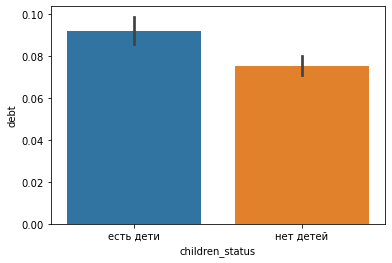

In [16]:
sns.barplot (y = data['debt'], x = data ['children_status'])
plt.show()

**Вывод**

Среди клиентов банка, имеющих задолженности меньше тех, кто имеет детей. Соотвественно наличие детей положительно влияет на вероятность возварата кредита. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [17]:
data_pivot = data.pivot_table(
    index = ['family_status'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
display (data_pivot.sort_index(ascending = False))


debt_status,есть задолженность,нет задолженности
family_status,,
женат / замужем,931,11408
гражданский брак,388,3763
вдовец / вдова,63,896
в разводе,85,1110
Не женат / не замужем,274,2536


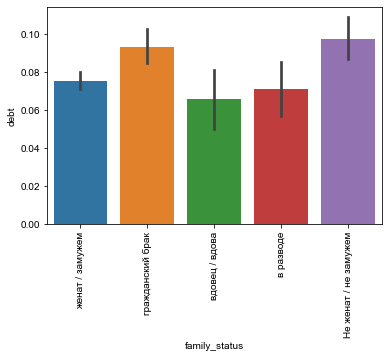

In [23]:
sns.barplot (y = data['debt'], x = data ['family_status'])
sns.set(style="white")
plt.xticks(rotation=90)
plt.show()

**Вывод**

Семейное положение слабо влияет на вероятность возврата кредита. Среди должников в каждом сегементе около 1-2 процентов должников или меньше. Но больше всего тех, кто не замужем\не женат. Меньше всего должников среди категории вдовец\вдова. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

debt_status,есть задолженность,нет задолженности
income,,
средний уровень дохода,661,7146
низкий уровень дохода,354,4109
высокий уровень дохода,726,8458


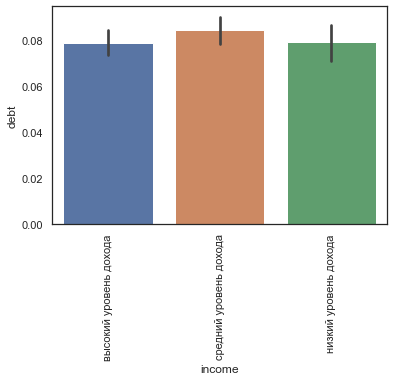

In [27]:
data_pivot = data.pivot_table(
    index = ['income'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
display (data_pivot.sort_index(ascending = False))
sns.barplot (y = data['debt'], x = data ['income'])
sns.set(style="white")
plt.xticks(rotation=90)
plt.show()

**Вывод**

Больше всего задолженностей среди клиентов со среднем уровнем дохода. В целом этот показатель не сильно влияет на вероятность возврата. Среди всех категорий примерно одинаковый процент должников 

- Как разные цели кредита влияют на его возврат в срок?

debt_status,есть задолженность,нет задолженности
category,,
свадьба,186,2138
обучение,370,3643
недвижимость,782,10029
автомобиль,403,3903


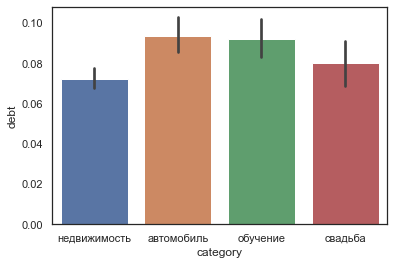

In [29]:
data_pivot = data.pivot_table(
    index = ['category'], 
    columns = 'debt_status',
    values ='debt',
    aggfunc = 'count')
display (data_pivot.sort_index(ascending = False))
sns.barplot (y = data ['debt'], x = data ['category'])
plt.show()

**Вывод**

По процентному соотношению больше всего должников среди тех, кто брал кредит на автомобили

## Шаг 4. Общий вывод

Вероятность возврата кредита в срок выше у клиентов с детьми;
- Данная гипотеза не подтвердилась. Среди клиентов, у которых нет задолжности 13028 без детей и 6685 тех, у кого дети есть. Среди должников банка 678 клиентов, у которых есть дети и 1063 у которых нет.
Наличие супруга/супруга у заемщика положительно влияет на возврат кредита в срок;
- На вероятность возврата кредита положительно влияет наличие детей и супруга\супруги. Нет задолжености у 11408 клиентов банка, которые находятся в браке. И всего 931 клиент, находясь в браке имеет задолженность. 
Высокий уровень дохода обеспечивает возврат кредита в срок;
- Данная гипотеза не пдтвердилась. Больше всего должников банка (726) среди категории "высокий уровень дохода", т.е. свыше 150 тыс. в месяц. Меньше всего должников (354) в сегементе "низкий уровень дохода", т.е. меньше 100 тыс. руб. 
Вероятность возврата кредита в срок зависит от цели кредита.
- Да, это действительно так. Больше всего должников среди тех, кто брал кредит на покупку недвижимость. Таких клиентов 782 чел. Скорее всего увеличение количества должников в этом сегменте обьясняется самым продолжительным сроком кредитования среди других категорий. Меньше всего должников среди тех, кто берет кредиты с целью организации свадьбы, таких клиентов всего 186. Полагаю, что это обьясняется небольшой суммой кредита из которой повышается вероятность возврата в срок 